In [1]:
from rdkit import Chem
import pandas as pd

from rdkit.Chem.Draw import IPythonConsole
from tqdm.notebook import tqdm

from rdkit.Chem.AllChem import ReactionFromSmarts

import matplotlib.pyplot as plt

import numpy as np

import coupling_utils
import multiprocessing as mp

In [2]:
def get_NO_count(smiles):
    return(np.sum([smiles.count(char) for char in "NnOo"]))

In [3]:
deet_acid = Chem.MolFromSmiles("OC(=O)c1cc(C)ccc1")

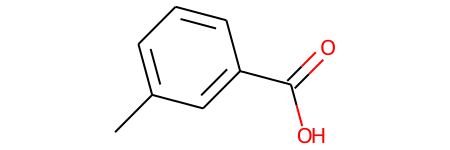

In [4]:
deet_acid

In [5]:
pubchem_small_amines = []

for file_ind in tqdm(range(112)):
    
    file_tag = str(file_ind).zfill(3)
    amines = pd.read_csv(f"../Docking_MPro/pubchem/pubchem_small_{file_tag}.txt",names = ["smiles","size","FC"])
    amines["NO_count"] = amines.smiles.apply(get_NO_count)
    pubchem_small_amines.append(amines)

  0%|          | 0/112 [00:00<?, ?it/s]

In [6]:
amines = pd.concat(pubchem_small_amines)

amines.drop_duplicates("smiles",inplace=True)

amines.reset_index(drop=True,inplace=True)

In [7]:
NOs = []
for i in range(np.max(amines.NO_count)):
    NOs.append((i, len(amines[amines.NO_count <= i])))


In [8]:
NOs

[(0, 0),
 (1, 245140),
 (2, 812075),
 (3, 1466910),
 (4, 1959111),
 (5, 2214614),
 (6, 2317487),
 (7, 2350268),
 (8, 2359711),
 (9, 2362497),
 (10, 2363626),
 (11, 2363958),
 (12, 2364021)]

In [9]:
small_amines = list(amines[amines.NO_count <= 3].smiles)

In [10]:
if __name__ == '__main__':
    with mp.Pool(32) as p:
        result = p.map(coupling_utils.couple_amide, small_amines,chunksize=100000)

In [11]:
out = pd.DataFrame({"smiles":result})

out.head()

,smiles
0,Cc1cccc(C(=O)NCC(C)O)c1
1,Cc1cccc(C(=O)NCCC=O)c1
2,Cc1cccc(C(=O)NC(CCl)C(=O)O)c1
3,Cc1cccc(C(=O)NCCCC=O)c1
4,Cc1cccc(C(=O)NCCCC(=O)O)c1


In [12]:
out["smiles"].to_csv("./DEET_products/DEET_amides.csv")